<a href="https://colab.research.google.com/github/rmnmndz11/Ejercicios_clase/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install simpy
import simpy
import random
import matplotlib.pyplot as plt


In [ ]:
def llegada_cliente(env, servidores, espera): #Esta función representa el proceso de llegada de los clientes al taller
    i = 0
    while True:
        yield env.timeout(random.expovariate(1/10))  #Generar un tiempo entre llegadas de los clientes,
        #La función expovariate() genera números aleatorios según una distribución exponencial, y en este caso, utilizamos una tasa media de llegada de 10 clientes por unidad de tiempo.
        i += 1
        env.process(atender_cliente(env, f'Cliente {i}', servidores, espera)) #llamamos a la función atender_cliente() para que el cliente reciba servicio.

In [ ]:
def atender_cliente(env, cliente, servidores, espera): #simulación del proceso de atención de un cliente en el taller.
    with servidores.request() as request:
        print(f'{cliente} llega al taller en el tiempo {env.now}') #Solicita un recurso del tipo servidores para ser atendido. El bloque with se encarga de manejar automáticamente la liberación del recurso al finalizar el proceso.
        yield request #El cliente espera hasta que se le asigna un recurso disponible para ser atendido.
        print(f'{cliente} comienza a ser atendido en el tiempo {env.now}')
        tiempo_llegada = env.now #Almacena el tiempo de llegada del cliente.
        yield env.timeout(random.expovariate(1/30))  #Simula el tiempo que el cliente pasa siendo atendido. Se utiliza una distribución exponencial con una tasa de servicio de 1/30.
        tiempo_salida = env.now #Almacena el tiempo en que el cliente termina de ser atendido.
        print(f'{cliente} termina de ser atendido en el tiempo {env.now}')

        # Calcular tiempo de espera del cliente
        tiempo_espera = tiempo_salida - tiempo_llegada #Calcula el tiempo de espera del cliente restando el tiempo de llegada al tiempo de salida.
        tiempos_espera.append(tiempo_espera) #Agrega el tiempo de espera del cliente a una lista para calcular el promedio posteriormente.

        if espera.level > 0: #Verifica si hay clientes en espera en la variable espera y, de ser así, permite que el cliente actual tome su lugar en la cola de espera.
            yield espera.get(1)

        # Imprimir el estado actual de los servidores
        print(f'Estado de los servidores en el tiempo {env.now}: {servidores.count}')

In [ ]:
# Variables para contabilizar el tiempo total en que el taller tiene 1, 2 y 3 mecánicos
tiempo_taller_1_mecanico = 0
tiempo_taller_2_mecanicos = 0
tiempo_taller_3_mecanicos = 0

# Variables para contabilizar la cantidad de veces que hay 1, 2 y 3 mecánicos
cantidad_1_mecanico = 0
cantidad_2_mecanicos = 0
cantidad_3_mecanicos = 0

# Lista para almacenar los tiempos de espera de los clientes
tiempos_espera = []

# Lista para almacenar los promedios de tiempo de espera de cada simulación
promedios_tiempo_espera = []

# Listas para almacenar las probabilidades de tener 1, 2 y 3 mecánicos en cada simulación
probabilidades_1_mecanico = []
probabilidades_2_mecanicos = []
probabilidades_3_mecanicos = []

In [ ]:
# Función para calcular el tiempo en que el taller tiene determinada cantidad de mecánicos
def calcular_tiempo_taller(num_mecanicos): # recibe como argumento el número de mecánicos y devuelve el tiempo total en que el taller ha tenido esa cantidad de
    if num_mecanicos == 1:
        return tiempo_taller_1_mecanico #devuelve el valor de la variable tiempo_taller_2_mecanico, que representa el tiempo total en que el taller ha tenido 2 mecánico.
    elif num_mecanicos == 2:
        return tiempo_taller_2_mecanicos #devuelve el valor de la variable tiempo_taller_2_mecanico, que representa el tiempo total en que el taller ha tenido 2 mecánico.
    elif num_mecanicos == 3:
        return tiempo_taller_3_mecanicos #devuelve el valor de la variable tiempo_taller_2_mecanico, que representa el tiempo total en que el taller ha tenido 2 mecánico.
    else:
        return 0


In [ ]:
def contar_mecanicos(env, servidores):
    global tiempo_taller_1_mecanico, tiempo_taller_2_mecanicos, tiempo_taller_3_mecanicos #representan el tiempo total en que el taller ha tenido 1, 2 y 3 mecánicos respectivamente.
    global cantidad_1_mecanico, cantidad_2_mecanicos, cantidad_3_mecanicos #representan la cantidad total de veces que el taller ha tenido 1, 2 y 3 mecánicos respectivamente.
    while True: #Verifica la cantidad de mecánicos actualmente disponibles en el recurso servidores utilizando la propiedad count.
        if servidores.count == 1:
            tiempo_taller_1_mecanico += 1 #se incrementa tiempo_taller_1_mecanico en 1 para contabilizar un intervalo de tiempo en el que el taller ha tenido 1 mecánico
            cantidad_1_mecanico += 1 # se incrementa cantidad_1_mecanico en 1 para contar la cantidad de veces que ha ocurrido
        elif servidores.count == 2:
            tiempo_taller_2_mecanicos += 1
            cantidad_2_mecanicos += 1
        elif servidores.count == 3:
            tiempo_taller_3_mecanicos += 1
            cantidad_3_mecanicos += 1
        yield env.timeout(1)

In [ ]:
def simulacion():

    # Configuración de la simulación
    env = simpy.Environment() #Crea un entorno de simulación utilizando la clase simpy.Environment(). El entorno es necesario para ejecutar la simulación y gestionar los eventos y procesos que ocurren en ella.
    servidores = simpy.Resource(env, capacity=3) #Crea un recurso de tipo simpy.Resource() para representar a los mecánicos del taller. El parámetro capacity=3 indica que hay tres mecánicos disponibles en el taller.
    espera = simpy.Container(env, init=15, capacity=15)  #Representar la cola de espera de los clientes en el taller. El parámetro init=15 indica que inicialmente hay 15 espacios ocupados en la cola. El parámetro capacity=15 establece la capacidad máxima de la cola, es decir, la cantidad máxima de clientes que pueden estar en espera.

    # Ejecución de la simulación
    env.process(llegada_cliente(env, servidores, espera)) #Cada vez que un cliente llega al taller, se crea un proceso para atenderlo utilizando la función atender_cliente(env, cliente, servidores, espera)
    env.process(contar_mecanicos(env, servidores)) #Inicia el proceso de conteo de mecánicos en el taller. Su objetivo es mantener un seguimiento continuo de la cantidad de mecánicos presentes en el taller y actualizar las variables correspondientes.
    env.run(until=480)  # Tiempo de simulación: 480 unidades

    # Cálculo de las probabilidades
    tiempo_simulacion = tiempo_taller_1_mecanico + tiempo_taller_2_mecanicos + tiempo_taller_3_mecanicos #Se calcula la suma del tiempo total que el taller ha tenido 1, 2 y 3 mecánicos. Esto representa la duración total de la simulación.
    probabilidad_1_mecanico = cantidad_1_mecanico / tiempo_simulacion if tiempo_simulacion > 0 else 0 #Se calcula la probabilidad de tener 1 mecánico dividiendo la cantidad de veces que se ha tenido 1 mecánico entre el tiempo total de simulación.
    #Se utiliza una expresión condicional para evitar una división por cero en caso de que el tiempo de simulación sea cero.
    probabilidad_2_mecanicos = cantidad_2_mecanicos / tiempo_simulacion if tiempo_simulacion > 0 else 0
    probabilidad_3_mecanicos = cantidad_3_mecanicos / tiempo_simulacion if tiempo_simulacion > 0 else 0

    # Cálculo del promedio de tiempo de espera y almacenamiento en la lista
    promedio_tiempo_espera = sum(tiempos_espera) / len(tiempos_espera) if tiempos_espera else 0 #Calcula el promedio del tiempo de espera de los clientes. Si la lista está vacía, lo que significa que no hubo clientes atendidos, se asigna un valor de 0 al promedio.
    print(f'Promedio de tiempo de espera de los clientes: {promedio_tiempo_espera}')
    promedios_tiempo_espera.append(promedio_tiempo_espera) #Agrega el promedio del tiempo de espera de los clientes a la lista promedios_tiempo_espera, que se utiliza posteriormente para generar la gráfica de los promedios de tiempo de espera.

    # Almacenar las probabilidades en las listas correspondientes
    probabilidades_1_mecanico.append(probabilidad_1_mecanico) #Agrega la probabilidad de tener 1 mecánico a la lista probabilidades_1_mecanico.
    probabilidades_2_mecanicos.append(probabilidad_2_mecanicos) #Agrega la probabilidad de tener 2 mecánico a la lista probabilidades_1_mecanico.
    probabilidades_3_mecanicos.append(probabilidad_3_mecanicos) #Agrega la probabilidad de tener 3 mecánico a la lista probabilidades_1_mecanico.

    # Imprimir los resultados de cada simulación
    print(f'Tiempo total con 1 mecánico (Simulación {i+1}): {tiempo_taller_1_mecanico}')
    print(f'Tiempo total con 2 mecánicos (Simulación {i+1}): {tiempo_taller_2_mecanicos}')
    print(f'Tiempo total con 3 mecánicos (Simulación {i+1}): {tiempo_taller_3_mecanicos}')
    print(f'Probabilidad de tener 1 mecánico (Simulación {i+1}): {probabilidad_1_mecanico}')
    print(f'Probabilidad de tener 2 mecánicos (Simulación {i+1}): {probabilidad_2_mecanicos}')
    print(f'Probabilidad de tener 3 mecánicos (Simulación {i+1}): {probabilidad_3_mecanicos}')
    print('---')

In [ ]:
simulacion() #Ejecuta la simulación

In [ ]:
def modelo(n): #Se repite n veces la simulación
  for i in range (n):
    simulacion()

In [ ]:
modelo(20)

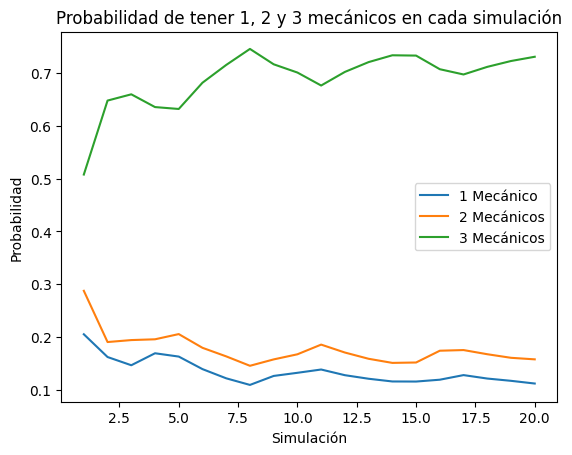

In [ ]:
# Gráfica de las probabilidades de tener 1, 2 y 3 mecánicos en cada simulación
simulaciones = range(1, 21) #Crea una secuencia de números del 1 a n, que representa el número de simulaciones realizadas.
plt.plot(simulaciones, probabilidades_1_mecanico, linestyle='-', label='1 Mecánico')
plt.plot(simulaciones, probabilidades_2_mecanicos, linestyle='-', label='2 Mecánicos')
plt.plot(simulaciones, probabilidades_3_mecanicos, linestyle='-', label='3 Mecánicos')
plt.xlabel('Simulación')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de tener 1, 2 y 3 mecánicos en cada simulación')
plt.legend()
plt.show()

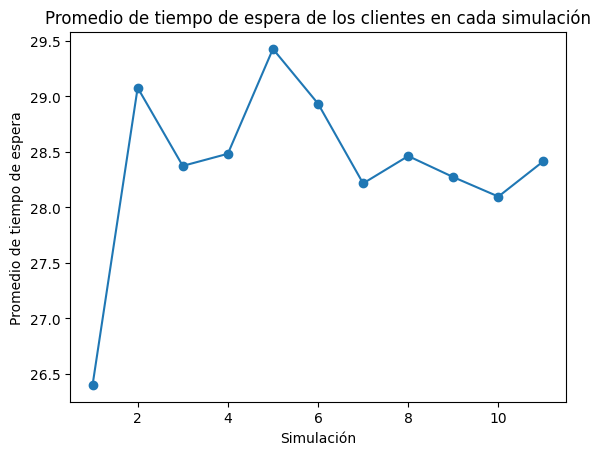

In [ ]:
# Gráfica de los promedios de tiempo de espera
simulaciones = range(1, 21)
plt.plot(simulaciones, promedios_tiempo_espera, marker='o')
plt.xlabel('Simulación')
plt.ylabel('Promedio de tiempo de espera')
plt.title('Promedio de tiempo de espera de los clientes en cada simulación')
plt.show()